This notebook will apply the PCA method to the music features data and then conduct the following clustering methods: 
1. k-means
2. hierarchical


In [48]:
import pandas as pd 
import matplotlib
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import MinMaxScaler
from plotly import graph_objects as go
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [4]:
#Read music feature data into python
file_name = 'music_features.csv'
music_features = pd.read_csv(file_name, index_col=0)

In [5]:
music_features.head()

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence
160541,0.131,0.748,188491.0,0.627,000xQL6tZNLJzIrtIgxqSl,0.000000,7.0,0.0852,-6.029,1.0,0.0639,120.963,4.0,audio_features,0.524
45268,0.684,0.509,187119.0,0.803,000xYdQfIZ4pDmBGzQalKU,0.000539,0.0,0.4630,-6.743,1.0,0.0400,166.018,4.0,audio_features,0.651
236479,0.105,0.772,167866.0,0.635,001b8t3bYPfnabpjpfG1Y4,0.000000,9.0,0.1170,-4.846,1.0,0.3720,95.951,4.0,audio_features,0.541
218937,0.145,0.807,188395.0,0.552,001cKCt7jEOzXjqgkn9DQf,0.000000,8.0,0.0999,-8.966,1.0,0.3050,119.988,4.0,audio_features,0.287
193090,0.159,0.683,180933.0,0.676,003F0rm5lqxcmhvJPKgfaJ,0.000000,1.0,0.0726,-6.688,0.0,0.1470,98.992,4.0,audio_features,0.434


In [6]:
music_features = music_features.drop(columns=['type'])

In [7]:
music_features.nunique()

acousticness         3599
danceability          889
duration_ms         49403
energy               1220
id                  88126
instrumentalness     5142
key                    12
liveness             1669
loudness            13366
mode                    2
speechiness          1473
tempo               37438
time_signature          5
valence              1470
dtype: int64

In [8]:
features = list(music_features)

In [9]:
features.remove('id')

In [10]:
from sklearn.preprocessing import StandardScaler

feature_values = music_features.loc[:, features].values
normalized_values = StandardScaler().fit_transform(feature_values) # normalizing the features
np.mean(normalized_values),np.std(normalized_values)

(8.420049073685684e-17, 0.9999999999999998)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90)
principalComponents = pca.fit_transform(normalized_values)
principalDF = pd.DataFrame(data = principalComponents)

In [12]:
principalDF.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.451134,-0.033565,-0.439366,0.569575,-0.016130,0.316759,0.554029,-0.360533,-1.078593,0.110149
1,0.021821,1.748103,-1.119083,-2.078193,0.346411,-0.723661,-0.289637,-1.515539,0.975765,-1.260121
2,-1.080884,-1.439510,-0.394431,0.030598,-0.557967,-0.133521,-0.497757,0.253585,-1.397900,1.455529
3,0.288048,-1.355919,-0.412265,-0.186526,-0.410735,0.724761,-0.627038,0.277819,-1.238071,1.280738
4,-0.327189,-0.569155,-0.424199,0.695444,0.009849,0.219913,-0.097795,1.509594,0.569051,-0.782480


In [42]:
#get sample of principal components to run in dendogram 
principalDF_sample = principalDF.sample(frac=0.50, replace = False)

In [89]:
principalDF_sample.size

264384

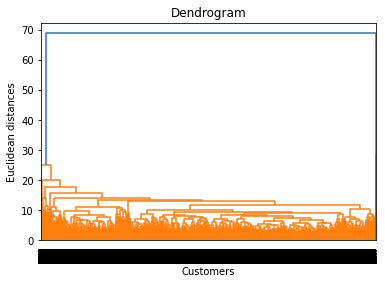

In [103]:
dendrogram = sch.dendrogram(sch.linkage(principalDF_sample.values, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [104]:
hc4 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='complete')
#hc6 = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')

In [105]:
principalDF_sample['AC Cluster 4'] = hc4.fit_predict(principalDF_sample.values)
#principalDF_sample['AC Cluster 6'] = hc6.fit_predict(principalDF_sample.values)

In [106]:
music_features['AC Cluster 4'] = principalDF_sample['AC Cluster 4']
#music_features['AC Cluster 6'] = principalDF_sample['AC Cluster 6']

In [107]:
music_features[music_features['AC Cluster 4'].notnull()] 

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,AC Cluster 4,AC Cluster 6
7610,0.3950,0.552,241014.0,0.578,009Zz28Vgvnc5FvMXs6dEm,0.000000,11.0,0.1460,-9.318,0.0,0.3360,89.662,4.0,0.590,0.0,0.0
31581,0.7020,0.543,274960.0,0.373,009j4tQyJC53rmgTuXil9E,0.000003,11.0,0.1070,-10.504,1.0,0.0303,114.956,4.0,0.245,0.0,1.0
23060,0.4510,0.470,277310.0,0.475,00C47repvBYiWwkfE99faH,0.000000,8.0,0.1340,-6.730,1.0,0.0321,123.852,4.0,0.209,0.0,0.0
61060,0.2010,0.743,101851.0,0.454,00JZgGi6ZTM4jAvJcp4oIv,0.050400,0.0,0.1100,-5.522,1.0,0.0719,144.981,4.0,0.714,0.0,0.0
39445,0.0063,0.581,210347.0,0.919,00TVmX9spquyg0UKuN57l3,0.000003,6.0,0.1070,-4.324,0.0,0.0500,95.991,4.0,0.847,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36569,0.1030,0.470,173160.0,0.520,7zZhsd4me9GmNFs0xo57p5,0.000000,0.0,0.1280,-7.397,1.0,0.0400,121.277,4.0,0.346,0.0,1.0
84629,0.6700,0.833,112040.0,0.381,7zkQwd9ZjsqvGexq5oQ4m6,0.000000,9.0,0.0908,-13.381,0.0,0.0504,117.016,4.0,0.767,0.0,0.0
80940,0.4590,0.649,238080.0,0.417,7znCkOoJw2PZxbgtdYnt6T,0.002140,9.0,0.0818,-12.438,0.0,0.0460,125.021,4.0,0.353,0.0,0.0
38347,0.3940,0.755,216000.0,0.764,7zoP4qnuk0npMUMAG3D1HA,0.000000,6.0,0.1060,-4.043,0.0,0.0315,100.984,4.0,0.851,0.0,1.0


In [77]:
feature_list = list(music_features.loc[:, music_features.columns != 'id'])

In [109]:
scaled_df = music_features[feature_list].copy()
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(scaled_df) 
scaled_df.loc[:,:] = scaled_values
scaled_df['AC Cluster 4'] = music_features['AC Cluster 4']
#scaled_df['AC Cluster 6'] = music_features['AC Cluster 6']
scaled_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,acousticness,acousticness,AC Cluster 4
160541,0.131526,0.757085,0.047786,0.627,0.000000,0.636364,0.086061,0.875328,1.0,0.066149,0.525309,0.8,0.524525,0.131526,0.131526,NaN
45268,0.686747,0.515182,0.047436,0.803,0.000546,0.000000,0.467677,0.863748,1.0,0.041408,0.720971,0.8,0.651652,0.686747,0.686747,NaN
236479,0.105422,0.781377,0.042529,0.635,0.000000,0.818182,0.118182,0.894515,1.0,0.385093,0.416689,0.8,0.541542,0.105422,0.105422,NaN
218937,0.145582,0.816802,0.047762,0.552,0.000000,0.727273,0.100909,0.827695,1.0,0.315735,0.521075,0.8,0.287287,0.145582,0.145582,NaN
193090,0.159639,0.691296,0.045860,0.676,0.000000,0.090909,0.073333,0.864640,0.0,0.152174,0.429895,0.8,0.434434,0.159639,0.159639,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154441,0.036145,0.860324,0.034640,0.739,0.000000,0.636364,0.291919,0.789030,1.0,0.237060,0.486659,0.8,0.602603,0.036145,0.036145,NaN
155996,0.730924,0.428138,0.066158,0.360,0.000000,0.272727,0.106061,0.819715,1.0,0.038509,0.567056,0.8,0.291291,0.730924,0.730924,NaN
101624,0.200803,0.644737,0.061313,0.741,0.000000,0.818182,0.186869,0.902332,1.0,0.031056,0.390767,0.8,0.419419,0.200803,0.200803,NaN
114871,0.354418,0.828947,0.052913,0.679,0.000000,1.000000,0.293939,0.827403,0.0,0.107660,0.607908,0.8,0.551552,0.354418,0.354418,NaN


In [111]:
opt_clusters = 4


fig = go.Figure()

angles = feature_list
angles.append(angles[0])
layoutdict = dict(
            radialaxis=dict(
            visible=True,
            range=[0, 1]
            ))
for i in range(opt_clusters):
    subset = scaled_df[scaled_df['AC Cluster 4'] == i]
    data = [np.mean(subset[col]) for col in feature_list]
    data.append(data[0])
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=angles,
        fill='toself',
        name="Cluster " + str(i)))
    
fig.update_layout(
        polar=layoutdict,
        showlegend=True,template='plotly_dark'
        )
fig.show()